# ECE/CS 434 | MP6: Dynamic Time Warping - Extra Credit
<br />
<nav>
    <span class="alert alert-block alert-warning">Due at 11:59PM May 14th 2021 on Gradescope</span> |
    <a href="https://www.gradescope.com/courses/223105">Gradescope</a> | 
    <a href="https://courses.grainger.illinois.edu/cs434/sp2021/">Course Website</a> | 
    <a href="http://piazza.com/illinois/spring2021/csece434">Piazza</a>
</nav><br> 

**Name(s):** _ , _<br>
**NetID(s):** _ , _

<hr />  

----
## Objective
In this extra credit portion, you will:
- Modify the Dynamic Time Warping Algorithm you implemented earlier to detect abnormal ECG signals

----
## Imports

In [1]:
import numpy as np
import random
import scipy

# This function is used to format test results. You don't need to touch it.
def display_table(data):
    from IPython.display import HTML, display

    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>{}</h4><td>".format(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

----
## Introduction
An electrocardiogram(ECG or EKG) is a graph of voltage over time of the electrical activities of the heart. There are three main components to an ECG: the P wave, which represents the depolarization of the atria, blood being pumped to your heart; the QRS complex, which represents the depolarization of the ventricles, blood being pumped to your entire body; and the T wave, which represents the repolarization of the ventricles[[1]](#1). <img src="pqrst.png" width="300"> The image above is a textbook example of a normal ECG. Notice that the P wave has the smallest amplitude, and in practice is often masked by noise. The T wave is the second smallest in amplitude and the QRS complex corresponds to the largest spike. Run the code cell below to see a real example of a normal ECG and an abnormal ECG.

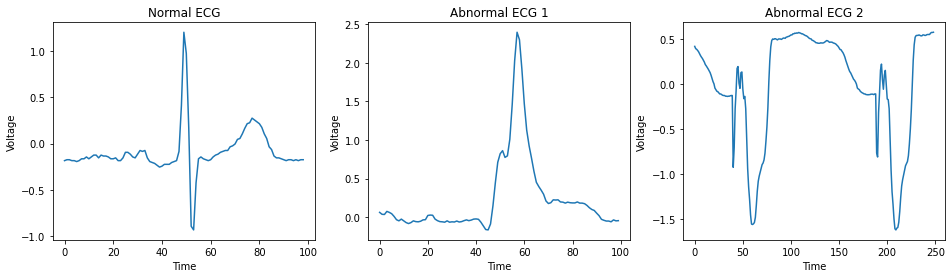

In [2]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    normal = np.loadtxt(open('normal.csv', "rb"), delimiter=",", skiprows=1)
    abnormal1 = np.loadtxt(open('7.csv', 'rb'), delimiter=',', skiprows=1)
    abnormal2 = np.loadtxt(open('9.csv', 'rb'), delimiter=',', skiprows=1)
    fig, ax = plt.subplots(1, 3, figsize=(16,4))
    ax[0].plot(normal)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Voltage')
    ax[0].set_title('Normal ECG')
    ax[1].plot(abnormal1[0:100])
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Voltage')
    ax[1].set_title('Abnormal ECG 1')
    ax[2].plot(abnormal2[50:300])
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Voltage')
    ax[2].set_title('Abnormal ECG 2')

Notice that abnormal ECGs may have missing peaks, irregular shapes, etc. However, among individuals with **normal** ECGs, they may still vary in terms of their amplitudes and frequencies. 

----
## Your Task
In this MP, you will be given a template of a normal ECG. You will then be given uncategorized ECG signals and your task is to determine whether the ECG is normal or abnormal. You are encouraged to copy over your DTW algorithm and make modifications as necessary. However, you are free to use other approaches.

----
## Your Implementation
Implement your algorithm in the function `ecg_check(template, x)`. Do **NOT** change its function signature. You are, however, free to define and use helper functions. You are **NOT** allowed to use existing Python DTW packages.

In [3]:
def find_missing(X, Y, N):
    x_len, y_len = len(X), len(Y)
    window = np.max([N, abs(x_len - y_len)])
    
    dtw_arr = np.full((x_len + 1, y_len + 1), np.inf)
    dtw_arr[0][0] = 0
    
    for i in range(1, dtw_arr.shape[0]):
        for j in range(np.max([1, i - window]), np.min([y_len, i + window])+1):
            cost = abs(X[i - 1] - Y[j - 1])
            prev_min = np.min([dtw_arr[i - 1, j], dtw_arr[i, j - 1], dtw_arr[i - 1, j - 1]])
            dtw_arr[i][j] = cost + prev_min
    
    candidates = []
    for i in range(dtw_arr.shape[0]):
        min_cost_index = np.argmin(dtw_arr[i])
        candidates.append(min_cost_index)
        
    from collections import Counter
    c = Counter(candidates)
    print(c.most_common(3))
    ret = [x[0] for x in c.most_common(3)]
    
    return ret, dtw_arr

def plot_ecg(ecg):
    plt.figure(figsize=(3, 1), dpi=72)
    plt.plot(ecg)
    plt.show()

In [12]:
def ecg_check(template, x):
    """Checks whether the given ECG signal x is normal or not, using the normal template.
    Args:
      template: A numpy array representing a normal ECG signal. It will only contain 1 P-QRS-T cycle.
      x: A numpy array representing the ECG signal to check. The length of the signal may vary.
    Returns: True if x is normal and False if x is abnormal.
    """
    
    max_corr = 0
    max_corr_i = 0
    for i in range(len(x) - len(template)):
        x_clip = x[i:i+len(template)]
        corr = abs(np.corrcoef(template, x_clip)[0][1])
        if corr > max_corr:
            max_corr = corr
            max_corr_i = i
    
    x_clip_final = x[max_corr_i:max_corr_i+len(template)]
#     print(max_corr)
#     plot_ecg(template)
#     plot_ecg(x_clip_final)
    if abs(max_corr) > 0.7:
        return True
    return False

---
## Running and Testing
Use the cell below to run and test your code, and to get an estimate of your grade.

In [13]:
if __name__ == '__main__':
    output = [['Test', 'Ground Truth', 'Your Output', 'Grade']]
    truth = [True, True, True, True, True, False, False, False, False, False]
    template = np.loadtxt(open('normal.csv', "rb"), delimiter=",", skiprows=1)
    for i in range(len(truth)):
        x = np.loadtxt(open('{}.csv'.format(i), "rb"), delimiter=",", skiprows=1)
        student_answer = ecg_check(template, x)
        score = 10 if(student_answer == truth[i]) else 0
        output.append([i,truth[i], student_answer, "{:0.0f} / 10".format(score)])
    output.append(['<i>👻 Hidden test 0 👻</i>','<i>???</i>', '<i>???</i>', '<i>???</i> / 10'])
    output.append(['<i>...</i>','<i>...</i>', '<i>...</i>', '<i>...</i>'])
    output.append(['<i>👻 Hidden test 9 👻</i>','<i>???</i>', '<i>???</i>', '<i>???</i> / 10'])
    display_table(output)

0.9854001533193946
0.9920109184155341
0.9090317985483851
0.9952635601002878
0.9157875488325617
0.42302289607680793
0.41435948774456366
0.42504858958532266
0.46069807999259266
0.476439990423372


---
## Rubric
You will be graded on the 10 datasets provided to you (10 points each) and 10 additional datasets(10 points each). We will use the same code from the **Running and Testing** section above to grade all 20 traces of data. No partial credit is rewarded for individual test cases. To discourage random guessing, you will only receive extra credit if your raw score is >60%.

----
## Submission Guidelines
This Jupyter notebook (`MP6_EC.ipynb`) is the only file you need to submit on Gradescope. You will only see feedback regarding the provided test cases. Your overall score will be available after the deadline. Regrade requests are not accepted.

**Make sure any code you added to this notebook, except for import statements, is either in a function or guarded by `__main__`(which won't be run by the autograder). Gradescope will give you immediate feedback using the provided test cases. It is your responsibility to check the output before the deadline to ensure your submission runs with the autograder.**

## References
<a id="1">[1]</a> 
Lilly, Leonard S, ed. (2016). Pathophysiology of Heart Disease: A Collaborative Project of Medical Students and Faculty (sixth ed.). Lippincott Williams & Wilkins. p. 74.

<a id="2">[2]</a>
Nolle FM, Badura FK, Catlett JM, Bowser RW, Sketch MH. CREI-GARD, a new concept in computerized arrhythmia monitoring systems. Computers in Cardiology 13:515-518 (1986).

<a id="3">[3]</a>
Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.